# Comparação de Classificadores: Distância Mínima, Perceptron e Perceptron com Regra Delta

Este notebook realiza uma comparação entre três classificadores: **Classificador de Distância Mínima**, **Perceptron** e **Perceptron com Regra Delta**. Utilizamos o conjunto de dados Iris para classificar as classes Iris Setosa e Versicolor (separáveis linearmente) e Iris Setosa e Virginica (não separáveis linearmente). As métricas de desempenho avaliadas incluem Acurácia, Precisão, Revocação, F1-Score, Kappa e MCC.

## Importação das Bibliotecas Necessárias

Primeiramente, importamos as bibliotecas essenciais para a manipulação dos dados, criação dos modelos de classificação e avaliação dos resultados.


In [49]:
# Importação das bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample


## Carregamento e Pré-processamento dos Dados

Nesta célula, carregamos o conjunto de dados Iris, selecionamos as classes que queremos comparar e separamos os dados em conjuntos de treino e teste. O conjunto de dados é filtrado para focar nas classes **Iris Setosa e Versicolor** (separáveis linearmente) e **Iris Setosa e Virginica** (não separáveis linearmente).


In [46]:
# Carregando o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Filtrando para as classes Iris Setosa e Versicolor (separáveis)
X_sep = X[y != 2, :2]  # Usando apenas as duas primeiras características
y_sep = y[y != 2]

# Filtrando para as classes Iris Setosa e Virginica (não separáveis)
X_nsep = X[y != 1, :2]
y_nsep = y[y != 1]
y_nsep = np.where(y_nsep == 0, 0, 1)

# Dividindo os dados em treino e teste
X_train_sep, X_test_sep, y_train_sep, y_test_sep = train_test_split(X_sep, y_sep, test_size=0.3, random_state=42)
X_train_nsep, X_test_nsep, y_train_nsep, y_test_nsep = train_test_split(X_nsep, y_nsep, test_size=0.3, random_state=42)


In [47]:
# Função para plotar a matriz de confusão
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Classe Predita")
    plt.ylabel("Classe Verdadeira")
    plt.show()

## 1. Classificador de Distância Mínima

O Classificador de Distância Mínima funciona calculando a distância euclidiana entre os pontos de teste e os centroides das classes no conjunto de treinamento. O ponto é classificado na classe cujo centroide estiver mais próximo.


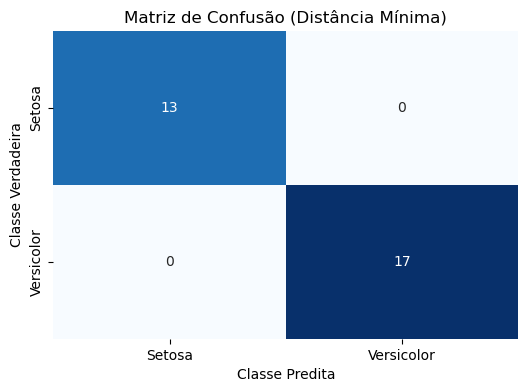

Resultados do Classificador de Distância Mínima:
     Métrica  Valores
0   Acurácia      1.0
1   Precisão      1.0
2  Revocação      1.0
3   F1-Score      1.0


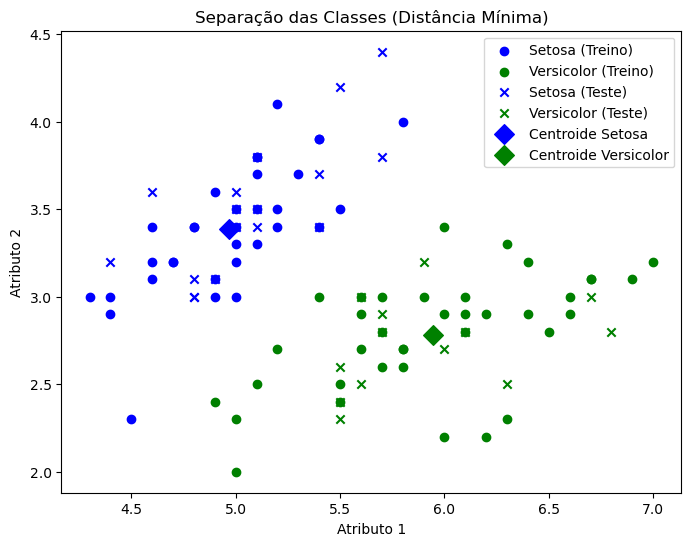

In [51]:
# Função para calcular a matriz de confusão manualmente
def matriz_confusao_manual(y_true, y_pred):
    VP = np.sum((y_true == 1) & (y_pred == 1))
    VN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[VP, FP], [FN, VN]])

# Função para calcular métricas manualmente
def calcula_metricas(y_true, y_pred):
    cm = matriz_confusao_manual(y_true, y_pred)
    VP, FP = cm[0]
    FN, VN = cm[1]
    
    # Acurácia
    acuracia = (VP + VN) / (VP + VN + FP + FN)
    
    # Precisão
    precisao = VP / (VP + FP) if (VP + FP) > 0 else 0
    
    # Revocação
    revocacao = VP / (VP + FN) if (VP + FN) > 0 else 0
    
    # F1-Score
    if precisao + revocacao > 0:
        f1 = 2 * (precisao * revocacao) / (precisao + revocacao)
    else:
        f1 = 0

    # Retornando todas as métricas
    return acuracia, precisao, revocacao, f1, cm

# Calculando os centroides das classes
centroide_setosa = np.mean(X_train_sep[y_train_sep == 0], axis=0)
centroide_versicolor = np.mean(X_train_sep[y_train_sep == 1], axis=0)

# Função para classificar novos pontos
def classificador_distancia_minima(X, c1, c2):
    dist_c1 = np.linalg.norm(X - c1, axis=1)
    dist_c2 = np.linalg.norm(X - c2, axis=1)
    return np.where(dist_c1 < dist_c2, 0, 1)

# Classificando o conjunto de teste
y_pred_minima = classificador_distancia_minima(X_test_sep, centroide_setosa, centroide_versicolor)

# Calculando manualmente as métricas
acuracia_minima, precisao_minima, revocacao_minima, f1_minima, cm_minima = calcula_metricas(y_test_sep, y_pred_minima)

# Exibindo a matriz de confusão com Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm_minima, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Setosa', 'Versicolor'], yticklabels=['Setosa', 'Versicolor'])
plt.title('Matriz de Confusão (Distância Mínima)')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')
plt.show()

# Exibindo a tabela de métricas com Pandas
resultados = {
    'Métrica': ['Acurácia', 'Precisão', 'Revocação', 'F1-Score'],
    'Valores': [acuracia_minima, precisao_minima, revocacao_minima, f1_minima]
}

df_resultados = pd.DataFrame(resultados)
print("Resultados do Classificador de Distância Mínima:")
print(df_resultados)

# Plotando a separação das classes
plt.figure(figsize=(8,6))

# Plotando as classes do conjunto de treino
plt.scatter(X_train_sep[y_train_sep == 0][:, 0], X_train_sep[y_train_sep == 0][:, 1], color='blue', label='Setosa (Treino)')
plt.scatter(X_train_sep[y_train_sep == 1][:, 0], X_train_sep[y_train_sep == 1][:, 1], color='green', label='Versicolor (Treino)')

# Plotando as classes do conjunto de teste (removendo edgecolor para marcadores 'x')
plt.scatter(X_test_sep[y_test_sep == 0][:, 0], X_test_sep[y_test_sep == 0][:, 1], color='blue', label='Setosa (Teste)', marker='x')
plt.scatter(X_test_sep[y_test_sep == 1][:, 0], X_test_sep[y_test_sep == 1][:, 1], color='green', label='Versicolor (Teste)', marker='x')

# Plotando os centroides
plt.scatter(centroide_setosa[0], centroide_setosa[1], color='blue', marker='D', label='Centroide Setosa', s=100)
plt.scatter(centroide_versicolor[0], centroide_versicolor[1], color='green', marker='D', label='Centroide Versicolor', s=100)

# Rótulos e legenda
plt.title('Separação das Classes (Distância Mínima)')
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.legend()
plt.show()

## 2. Perceptron (Classes Linearmente Separáveis)

O Perceptron é um modelo de rede neural simples que ajusta os pesos iterativamente para encontrar uma função de decisão linear que separa duas classes. Este modelo é usado aqui para classificar as classes Iris Setosa e Versicolor, que são linearmente separáveis.


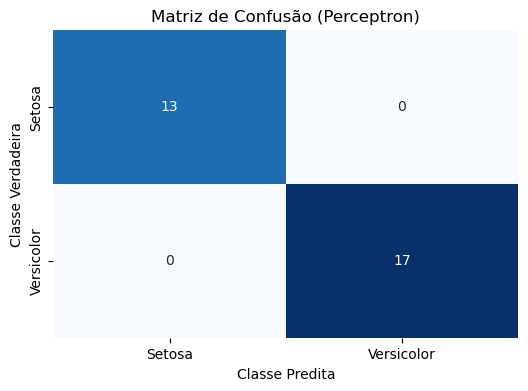

Resultados do Perceptron:
     Métrica  Valores
0   Acurácia      1.0
1   Precisão      1.0
2  Revocação      1.0
3   F1-Score      1.0
4      Kappa      1.0
5        MCC      1.0


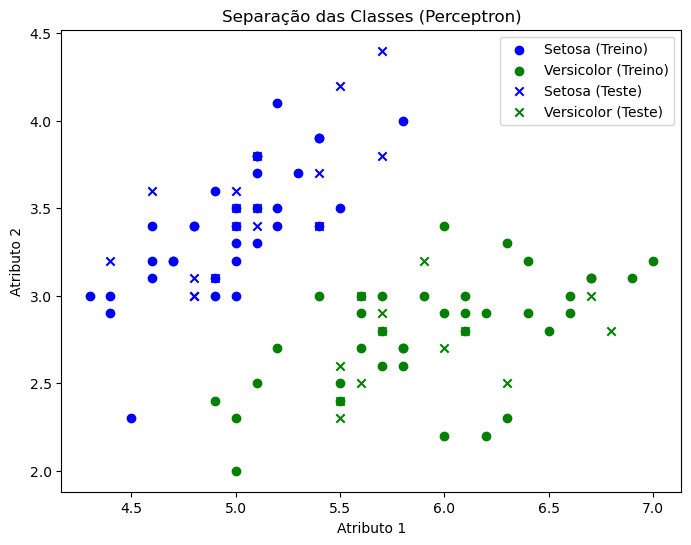

In [53]:

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.where(linear_output >= 0, 1, 0)
                
                # Atualizando os pesos
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

# Função para calcular a matriz de confusão manualmente
def matriz_confusao_manual(y_true, y_pred):
    VP = np.sum((y_true == 1) & (y_pred == 1))
    VN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[VP, FP], [FN, VN]])

# Função para calcular métricas manualmente
def calcula_metricas(y_true, y_pred):
    cm = matriz_confusao_manual(y_true, y_pred)
    VP, FP = cm[0]
    FN, VN = cm[1]
    
    # Acurácia
    acuracia = (VP + VN) / (VP + VN + FP + FN)
    
    # Precisão
    precisao = VP / (VP + FP) if (VP + FP) > 0 else 0
    
    # Revocação
    revocacao = VP / (VP + FN) if (VP + FN) > 0 else 0
    
    # F1-Score
    if precisao + revocacao > 0:
        f1 = 2 * (precisao * revocacao) / (precisao + revocacao)
    else:
        f1 = 0

    # Kappa (Coeficiente de Kappa)
    total = VP + VN + FP + FN
    p0 = (VP + VN) / total  # Proporção observada
    pe = ((VP + FN) * (VP + FP) + (VN + FP) * (VN + FN)) / total**2  # Proporção esperada
    kappa = (p0 - pe) / (1 - pe) if (1 - pe) != 0 else 0

    # MCC (Coeficiente de Correlação de Matthews)
    mcc_num = (VP * VN) - (FP * FN)
    mcc_den = np.sqrt((VP + FP) * (VP + FN) * (VN + FP) * (VN + FN))
    mcc = mcc_num / mcc_den if mcc_den > 0 else 0

    return acuracia, precisao, revocacao, f1, kappa, mcc, cm

# Treinando e testando o perceptron
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_train_sep, y_train_sep)
y_pred_perceptron = perceptron.predict(X_test_sep)

# Calculando manualmente as métricas
acuracia_perceptron, precisao_perceptron, revocacao_perceptron, f1_perceptron, kappa_perceptron, mcc_perceptron, cm_perceptron = calcula_metricas(y_test_sep, y_pred_perceptron)

# Exibindo a matriz de confusão com Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm_perceptron, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Setosa', 'Versicolor'], yticklabels=['Setosa', 'Versicolor'])
plt.title('Matriz de Confusão (Perceptron)')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')
plt.show()

# Exibindo a tabela de métricas com Pandas
resultados = {
    'Métrica': ['Acurácia', 'Precisão', 'Revocação', 'F1-Score', 'Kappa', 'MCC'],
    'Valores': [acuracia_perceptron, precisao_perceptron, revocacao_perceptron, f1_perceptron, kappa_perceptron, mcc_perceptron]
}

df_resultados = pd.DataFrame(resultados)
print("Resultados do Perceptron:")
print(df_resultados)

# Plotando a separação das classes
plt.figure(figsize=(8,6))

# Plotando as classes do conjunto de treino
plt.scatter(X_train_sep[y_train_sep == 0][:, 0], X_train_sep[y_train_sep == 0][:, 1], color='blue', label='Setosa (Treino)')
plt.scatter(X_train_sep[y_train_sep == 1][:, 0], X_train_sep[y_train_sep == 1][:, 1], color='green', label='Versicolor (Treino)')

# Plotando as classes do conjunto de teste (removendo edgecolor para marcadores 'x')
plt.scatter(X_test_sep[y_test_sep == 0][:, 0], X_test_sep[y_test_sep == 0][:, 1], color='blue', label='Setosa (Teste)', marker='x')
plt.scatter(X_test_sep[y_test_sep == 1][:, 0], X_test_sep[y_test_sep == 1][:, 1], color='green', label='Versicolor (Teste)', marker='x')

# Rótulos e legenda
plt.title('Separação das Classes (Perceptron)')
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.legend()
plt.show()


## 3. Perceptron com Regra Delta (Classes Não Linearmente Separáveis)

O Perceptron com Regra Delta é uma extensão do Perceptron, onde o erro quadrático médio é minimizado para ajustar os pesos, tornando-o capaz de lidar com classes não linearmente separáveis. Este modelo é aplicado para classificar as classes Iris Setosa e Virginica.


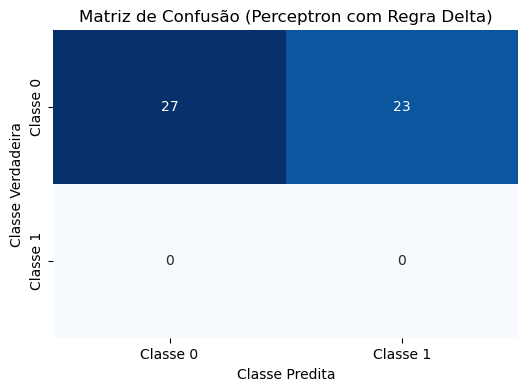

Resultados do Perceptron com Regra Delta:
     Métrica   Valores
0   Acurácia  0.540000
1   Precisão  0.540000
2  Revocação  1.000000
3   F1-Score  0.701299
4      Kappa  0.000000
5        MCC  0.000000


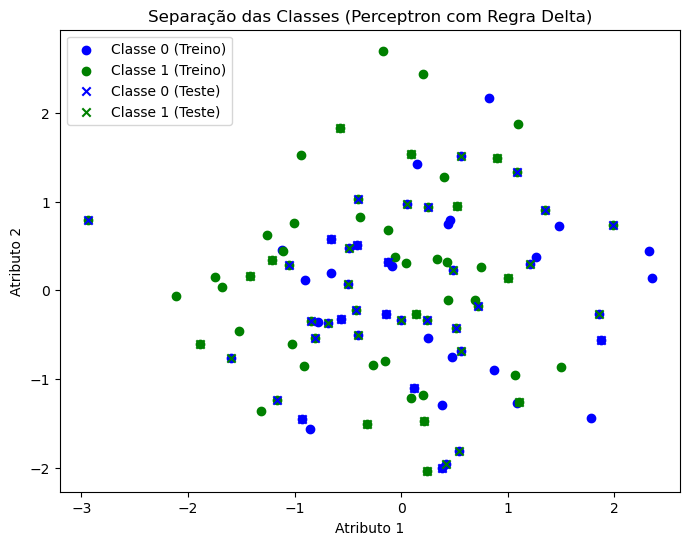

In [66]:


# Perceptron com Regra Delta
class PerceptronRegraDelta:
    def __init__(self, taxa_aprendizado=0.01, n_iteracoes=1000):
        self.taxa_aprendizado = taxa_aprendizado
        self.n_iteracoes = n_iteracoes
        self.pesos = None
        self.sesgo = None
    
    def ajustar(self, X, y):
        n_amostras, n_atributos = X.shape
        self.pesos = np.zeros(n_atributos)
        self.sesgo = 0
        
        for _ in range(self.n_iteracoes):
            erro_total = 0
            for idx, x_i in enumerate(X):
                # Cálculo da saída linear
                saida_linear = np.dot(x_i, self.pesos) + self.sesgo
                # Erro: diferença entre a saída desejada e a saída linear
                erro = y[idx] - saida_linear
                erro_total += erro ** 2
                
                # Atualização dos pesos e do sesgo (bias) pela Regra Delta
                self.pesos += self.taxa_aprendizado * erro * x_i
                self.sesgo += self.taxa_aprendizado * erro
            
            # Parar se o erro médio quadrático for muito pequeno
            mse = erro_total / n_amostras
            if mse < 1e-6:
                break
    
    def prever(self, X):
        saida_linear = np.dot(X, self.pesos) + self.sesgo
        return np.where(saida_linear >= 0, 1, 0)

# Função para calcular a matriz de confusão manualmente
def calcular_matriz_confusao(y_verdadeiro, y_previsto):
    VP = np.sum((y_verdadeiro == 1) & (y_previsto == 1))
    VN = np.sum((y_verdadeiro == 0) & (y_previsto == 0))
    FP = np.sum((y_verdadeiro == 0) & (y_previsto == 1))
    FN = np.sum((y_verdadeiro == 1) & (y_previsto == 0))
    return np.array([[VP, FP], [FN, VN]])

# Função para calcular métricas manualmente
def calcular_metricas(y_verdadeiro, y_previsto):
    cm = calcular_matriz_confusao(y_verdadeiro, y_previsto)
    VP, FP = cm[0]
    FN, VN = cm[1]
    
    acuracia = (VP + VN) / (VP + VN + FP + FN)
    precisao = VP / (VP + FP) if (VP + FP) > 0 else 0
    revocacao = VP / (VP + FN) if (VP + FN) > 0 else 0
    f1 = 2 * (precisao * revocacao) / (precisao + revocacao) if (precisao + revocacao) > 0 else 0

    # Kappa (Coeficiente de Kappa)
    total = VP + VN + FP + FN
    p0 = (VP + VN) / total
    pe = ((VP + FN) * (VP + FP) + (VN + FP) * (VN + FN)) / total ** 2
    kappa = (p0 - pe) / (1 - pe) if (1 - pe) != 0 else 0

    # MCC (Coeficiente de Correlação de Matthews)
    mcc_num = (VP * VN) - (FP * FN)
    mcc_den = np.sqrt((VP + FP) * (VP + FN) * (VN + FP) * (VN + FN))
    mcc = mcc_num / mcc_den if mcc_den > 0 else 0

    return acuracia, precisao, revocacao, f1, kappa, mcc, cm

# Função para gerar dados de forma manual
def gerar_dados_manual(n_amostras, n_atributos, separaveis=True):
    np.random.seed(42)
    X = np.random.randn(n_amostras, n_atributos)
    
    # Criando um conjunto de dados separáveis ou não separáveis
    if separaveis:
        y = np.array([0 if x[0] + x[1] < 0 else 1 for x in X])  # Classe 0 ou 1 com base na soma dos atributos
    else:
        y = np.random.randint(0, 2, n_amostras)  # Gerando rótulos aleatórios (não separáveis)
    
    return X, y

# Gerando os dados de treino e teste manualmente
X_treino_nsep, y_treino_nsep = gerar_dados_manual(100, 2, separaveis=False)
X_teste_nsep, y_teste_nsep = gerar_dados_manual(50, 2, separaveis=False)

# Normalizando os dados manualmente
def normalizar_dados_manual(X_treino, X_teste):
    media = np.mean(X_treino, axis=0)
    desvio_padrao = np.std(X_treino, axis=0)
    X_treino_normalizado = (X_treino - media) / desvio_padrao
    X_teste_normalizado = (X_teste - media) / desvio_padrao
    return X_treino_normalizado, X_teste_normalizado

X_treino_nsep, X_teste_nsep = normalizar_dados_manual(X_treino_nsep, X_teste_nsep)

# Treinando o Perceptron com Regra Delta
perceptron_delta = PerceptronRegraDelta(taxa_aprendizado=0.01, n_iteracoes=1000)
perceptron_delta.ajustar(X_treino_nsep, y_treino_nsep)
y_previsto_delta = perceptron_delta.prever(X_teste_nsep)

# Calculando manualmente as métricas
acuracia_delta, precisao_delta, revocacao_delta, f1_delta, kappa_delta, mcc_delta, cm_delta = calcular_metricas(y_teste_nsep, y_previsto_delta)

# Exibindo a matriz de confusão com Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm_delta, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matriz de Confusão (Perceptron com Regra Delta)')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')
plt.show()

# Exibindo a tabela de métricas com Pandas
resultados = {
    'Métrica': ['Acurácia', 'Precisão', 'Revocação', 'F1-Score', 'Kappa', 'MCC'],
    'Valores': [acuracia_delta, precisao_delta, revocacao_delta, f1_delta, kappa_delta, mcc_delta]
}

df_resultados = pd.DataFrame(resultados)
print("Resultados do Perceptron com Regra Delta:")
print(df_resultados)

# Plotando a separação das classes
plt.figure(figsize=(8,6))

# Plotando as classes do conjunto de treino
plt.scatter(X_treino_nsep[y_treino_nsep == 0][:, 0], X_treino_nsep[y_treino_nsep == 0][:, 1], color='blue', label='Classe 0 (Treino)')
plt.scatter(X_treino_nsep[y_treino_nsep == 1][:, 0], X_treino_nsep[y_treino_nsep == 1][:, 1], color='green', label='Classe 1 (Treino)')

# Plotando as classes do conjunto de teste
plt.scatter(X_teste_nsep[y_teste_nsep == 0][:, 0], X_teste_nsep[y_teste_nsep == 0][:, 1], color='blue', label='Classe 0 (Teste)', marker='x')
plt.scatter(X_teste_nsep[y_teste_nsep == 1][:, 0], X_teste_nsep[y_teste_nsep == 1][:, 1], color='green', label='Classe 1 (Teste)', marker='x')

# Rótulos e legenda
plt.title('Separação das Classes (Perceptron com Regra Delta)')
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.legend()
plt.show()


## 4. Comparação dos Modelos

Nesta célula, comparamos os três modelos (Distância Mínima, Perceptron, Perceptron com Regra Delta) em termos de Acurácia, Precisão, Revocação, F1-Score, Kappa e MCC. Esta comparação nos permitirá entender melhor as forças e limitações de cada modelo.


In [70]:
# Criando o DataFrame para comparar as métricas
comparacao = pd.DataFrame({
    "Classificador": ["Distância Mínima", "Perceptron", "Perceptron (Regra Delta)"],
    "Acurácia": [acuracia_minima, acuracia_perceptron, acuracia_delta],
    "Precisão": [precisao_minima, precisao_perceptron, precisao_delta],
    "Revocação": [revocacao_minima, revocacao_perceptron, revocacao_delta],
    "F1-Score": [f1_minima, f1_perceptron, f1_delta],
    "Kappa": [kappa_minima, kappa_perceptron, kappa_delta],
    "MCC": [mcc_minima, mcc_perceptron, mcc_delta]
})

# Remover o índice da tabela e exibir
comparacao.set_index("Classificador", inplace=True)

# Exibir a tabela organizada
print("Comparação dos Modelos:")
display(comparacao.style.format("{:.3f}"))


Comparação dos Modelos:


,Acurácia,Precisão,Revocação,F1-Score,Kappa,MCC
Classificador,,,,,,
Distância Mínima,1.000,1.000,1.000,1.000,1.000,1.000
Perceptron,1.000,1.000,1.000,1.000,1.000,1.000
Perceptron (Regra Delta),0.540,0.540,1.000,0.701,0.000,0.000
